<a href="https://colab.research.google.com/github/Jesus-Aguirre1/JESUS_2053240_ACTS_IA/blob/main/UU/ACTIVIDADES/%20AF7_Redes_Neuronales_Artificiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Martes N4-N6

Miembros de equipo:

Jesus Román Aguirre Hernandez 2053240

Jair Eduardo Benavides García 2052989

Sarahi Montserrat Barba Botello 204150

Raúl Alejandro Garza Elizondo 2066224


El código creado es una red neuronal artificial (RNA) para reconocer dígitos escritos a mano utilizando el dataset MNIST. Este conjunto de datos tiene imágenes en escala de grises de 28x28 píxeles con dígitos del 0 al 9. El proceso incluye la carga de datos, elaboracion del entrenamiento de la red neuronal, así como la evaluación del modelo y la visualización de predicciones sobre datos de prueba.

In [1]:
#Cargar librerías necesarias
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("Versión de TensorFlow:", tf.__version__)

Versión de TensorFlow: 2.19.0


In [50]:
#Cargar y dividir los datos
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data(path="mnist.npz")

print("Tamaño del conjunto de entrenamiento:", train_images.shape)
print("Tamaño del conjunto de prueba:", test_images.shape)


Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


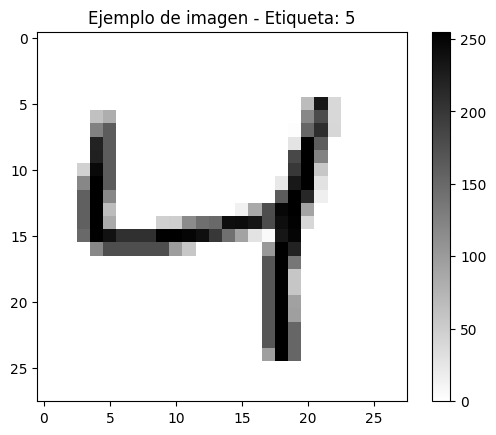

In [51]:
#Visualizar una imagen del dataset
plt.figure()
plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.title(f"Ejemplo de imagen - Etiqueta: {train_labels[0]}")
plt.show()


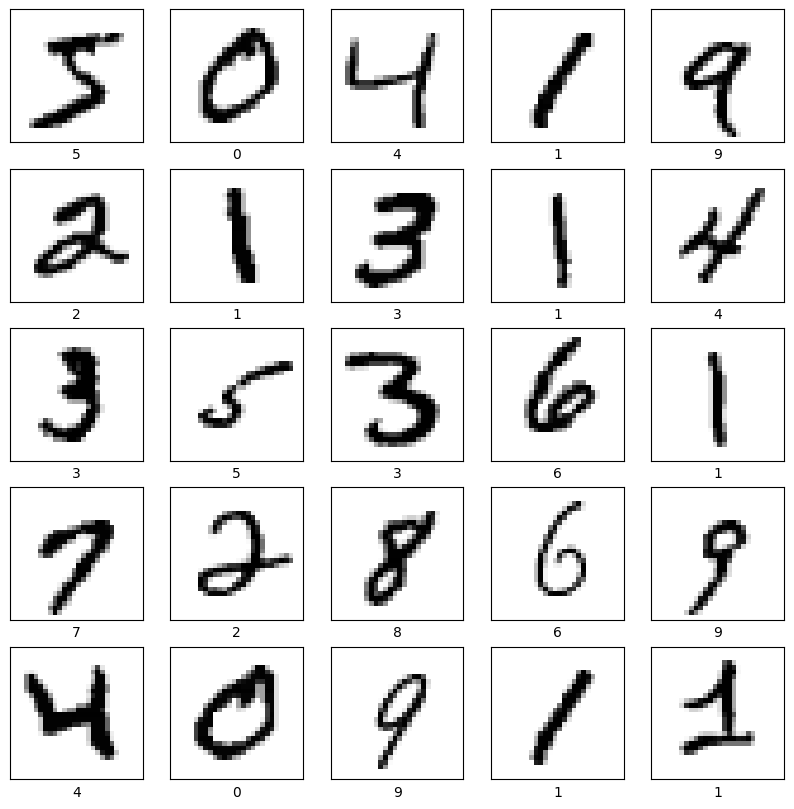

In [52]:
#Visualizar varias imágenes (5x5)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [53]:
#Normalización (Preprocesamiento)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [55]:
#Definir y construir el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     # Capa de entrada
    keras.layers.Dense(128, activation='relu'),     # Capa oculta
    keras.layers.Dense(10, activation='softmax')    # Capa de salida con softmax
])

In [56]:
#Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [57]:
#Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8812 - loss: 0.4235
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9656 - loss: 0.1161
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9768 - loss: 0.0775
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0561
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9864 - loss: 0.0439
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9895 - loss: 0.0353
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0260
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9935 - loss: 0.0217
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9955 - loss: 0.0155
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0139


In [58]:
#Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9805 - loss: 0.0708

Test accuracy: 0.9804999828338623


In [59]:
#Ealuacion con porcentaje
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nExactitud en datos de prueba: {:.2f}%".format(test_acc * 100))

313/313 - 1s - 2ms/step - accuracy: 0.9805 - loss: 0.0708

Exactitud en datos de prueba: 98.05%


In [42]:
#Realizar predicciones
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


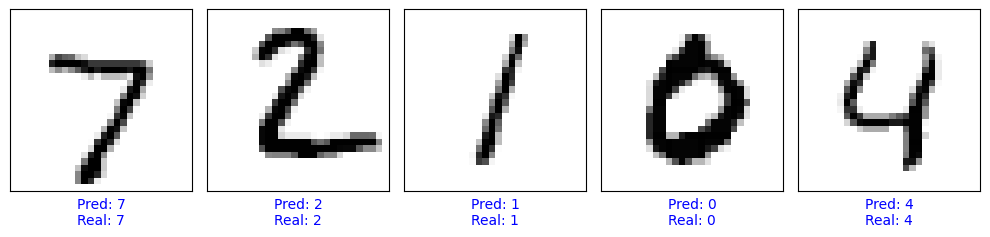

In [43]:
#Mostrar 5 predicciones con valor real
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {predicted_label}\nReal: {true_label}", color=color)

plt.tight_layout()
plt.show()